In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('Practise').getOrCreate()

24/12/16 21:24:17 WARN Utils: Your hostname, Mds-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.5 instead (on interface en0)
24/12/16 21:24:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/16 21:24:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df_pyspark = spark.read.csv('file3.csv',header=True,inferSchema=True)

In [4]:
df_pyspark.show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
|  NULL|  28|         6| 80000|
|  NULL|  33|      NULL|  NULL|
+------+----+----------+------+



**1- Dropping Columns**

In [5]:
df_pyspark.drop('Name').show()

+----+----------+------+
| Age|Experience|Salary|
+----+----------+------+
|  22|         2| 90000|
|  50|        12| 70000|
|  37|         8| 35000|
|  45|         1| 22500|
|  70|        22|110000|
|  18|         2|  5000|
|NULL|      NULL| 50000|
|  28|         6| 80000|
|  33|      NULL|  NULL|
+----+----------+------+



In [6]:
df_pyspark.show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
|  NULL|  28|         6| 80000|
|  NULL|  33|      NULL|  NULL|
+------+----+----------+------+



**2- Dropping Rows**

Let's drop the null values

In [7]:
df_pyspark.na.drop().show()

+------+---+----------+------+
|  Name|Age|Experience|Salary|
+------+---+----------+------+
| Tarif| 22|         2| 90000|
| Krish| 50|        12| 70000|
|   Sam| 37|         8| 35000|
|  Ramu| 45|         1| 22500|
|Mukesh| 70|        22|110000|
| Pinki| 18|         2|  5000|
+------+---+----------+------+



**3- Various Parameter In Dropping functionalities ( how || thresh || subset )**

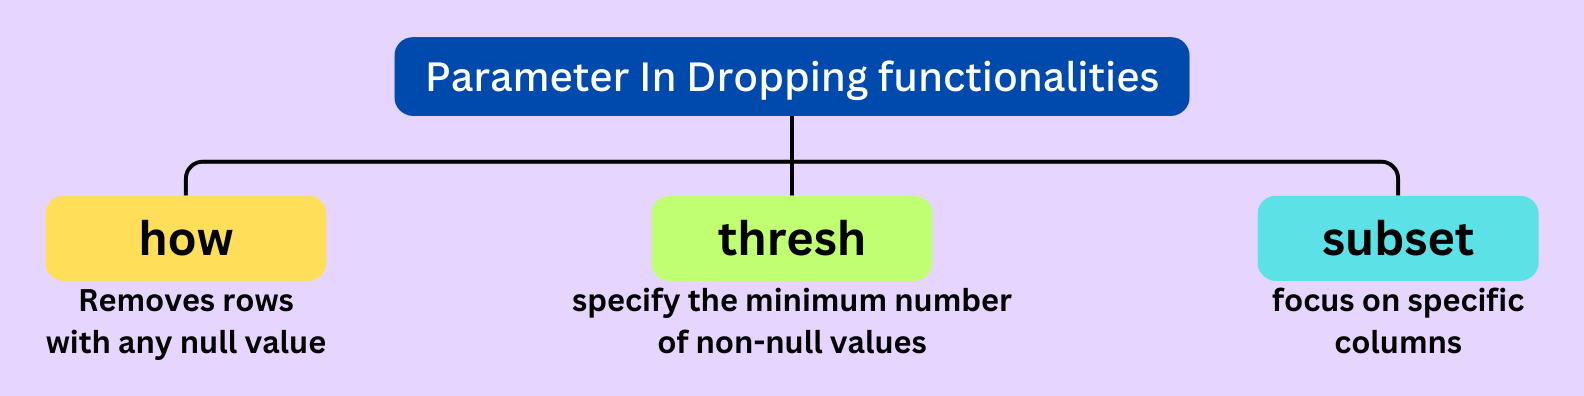

In PySpark, .na.drop() removes rows with missing (null) values:

1. **`how="any"`**: Removes rows with **any null** value. **(default)**  

2. **`how="all"`**: Removes rows where **all values are null**.

In [8]:
df_pyspark.na.drop(how="all").show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
|  NULL|  28|         6| 80000|
|  NULL|  33|      NULL|  NULL|
+------+----+----------+------+



nothing happens because there are no such rows which have all null values

The **thresh** parameter in .na.drop() is used to specify the **minimum number of non-null values** required in a row to keep it

In [9]:
df_pyspark.na.drop(how="any",thresh=2).show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
|  NULL|  28|         6| 80000|
+------+----+----------+------+



the last row is deleted because it has less than 2 non-null values

The **subset** parameter in .na.drop() is used to **focus on specific columns** when dropping rows with null values.

In [10]:
df_pyspark.na.drop(how="any",subset=['Name']).show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
+------+----+----------+------+



**4- Filling the Missing values**

In [11]:
df_pyspark.na.fill('Missing Value').show()

+-------------+----+----------+------+
|         Name| Age|Experience|Salary|
+-------------+----+----------+------+
|        Tarif|  22|         2| 90000|
|        Krish|  50|        12| 70000|
|          Sam|  37|         8| 35000|
|         Ramu|  45|         1| 22500|
|       Mukesh|  70|        22|110000|
|        Pinki|  18|         2|  5000|
|       Farhan|NULL|      NULL| 50000|
|Missing Value|  28|         6| 80000|
|Missing Value|  33|      NULL|  NULL|
+-------------+----+----------+------+



it will only fill the strings || if we want to use for numeric also we have to use **inferSchema=False**

In [12]:
df_pyspark = spark.read.csv('file3.csv',header=True,inferSchema=False)

In [13]:
df_pyspark.na.fill('Missing Value').show()

+-------------+-------------+-------------+-------------+
|         Name|          Age|   Experience|       Salary|
+-------------+-------------+-------------+-------------+
|        Tarif|           22|            2|        90000|
|        Krish|           50|           12|        70000|
|          Sam|           37|            8|        35000|
|         Ramu|           45|            1|        22500|
|       Mukesh|           70|           22|       110000|
|        Pinki|           18|            2|         5000|
|       Farhan|Missing Value|Missing Value|        50000|
|Missing Value|           28|            6|        80000|
|Missing Value|           33|Missing Value|Missing Value|
+-------------+-------------+-------------+-------------+



Filling the Missing values in specific column

In [14]:
df_pyspark.na.fill('Missing Value',['Age','Experience']).show()

+------+-------------+-------------+------+
|  Name|          Age|   Experience|Salary|
+------+-------------+-------------+------+
| Tarif|           22|            2| 90000|
| Krish|           50|           12| 70000|
|   Sam|           37|            8| 35000|
|  Ramu|           45|            1| 22500|
|Mukesh|           70|           22|110000|
| Pinki|           18|            2|  5000|
|Farhan|Missing Value|Missing Value| 50000|
|  NULL|           28|            6| 80000|
|  NULL|           33|Missing Value|  NULL|
+------+-------------+-------------+------+



**5- Handling Missing values by Mean, Median And Mode**

In [15]:
df_pyspark = spark.read.csv('file3.csv',header=True,inferSchema=True)

changed the **inferSchema=True** again

In [16]:
df_pyspark

DataFrame[Name: string, Age: int, Experience: int, Salary: int]

In [17]:
df_pyspark.show()

+------+----+----------+------+
|  Name| Age|Experience|Salary|
+------+----+----------+------+
| Tarif|  22|         2| 90000|
| Krish|  50|        12| 70000|
|   Sam|  37|         8| 35000|
|  Ramu|  45|         1| 22500|
|Mukesh|  70|        22|110000|
| Pinki|  18|         2|  5000|
|Farhan|NULL|      NULL| 50000|
|  NULL|  28|         6| 80000|
|  NULL|  33|      NULL|  NULL|
+------+----+----------+------+



Now I want to change the null value of "Experience" column by the **Mean**

i am just copy & pasting a code

In [18]:
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['Age', 'Experience', 'Salary'],
    outputCols=["{}_imputed".format(c) for c in ['Age', 'Experience', 'Salary']]
    ).setStrategy("mean")

In [19]:
imputer.fit(df_pyspark).transform(df_pyspark).show()

+------+----+----------+------+-----------+------------------+--------------+
|  Name| Age|Experience|Salary|Age_imputed|Experience_imputed|Salary_imputed|
+------+----+----------+------+-----------+------------------+--------------+
| Tarif|  22|         2| 90000|         22|                 2|         90000|
| Krish|  50|        12| 70000|         50|                12|         70000|
|   Sam|  37|         8| 35000|         37|                 8|         35000|
|  Ramu|  45|         1| 22500|         45|                 1|         22500|
|Mukesh|  70|        22|110000|         70|                22|        110000|
| Pinki|  18|         2|  5000|         18|                 2|          5000|
|Farhan|NULL|      NULL| 50000|         37|                 7|         50000|
|  NULL|  28|         6| 80000|         28|                 6|         80000|
|  NULL|  33|      NULL|  NULL|         33|                 7|         57812|
+------+----+----------+------+-----------+------------------+--

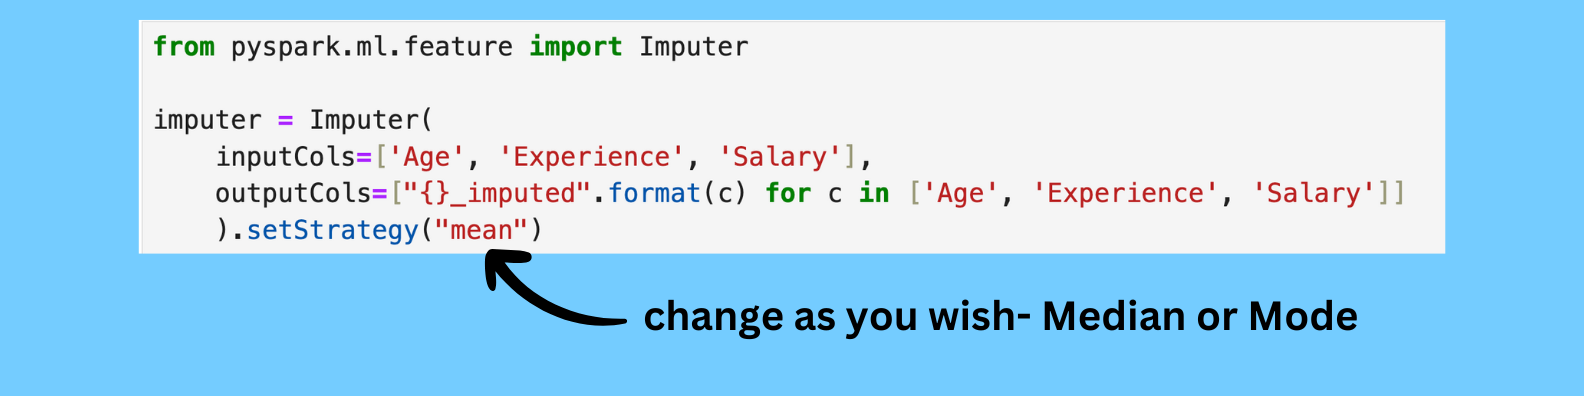